##  Optimization 1
###   Tensegrity Structure Problem
### Provided by:
### Sina Ainesazi Dovom
#####  April 2023
#####  NTNU, Trondheim, Norway

In [264]:
# Adding the needed libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Note: 
In this project for the problems 5 and 9 only the Gradient Descent method has been used since their constraint was "4 out of 8 nodes are fixed". But since the constraint of the problem 12 was a little hard to handle then for problem 12 both the Gradient descent and BFGS methods have been applied. 

### Problem 5

#### For problem 5 the total energy function only is being calculated with Energy of the cables and the external energy.

In [265]:
# Defining the total energy function for problem 5
def total_energy_5(X, cables, masses):
    
    """
    This function takes in the position of the nodes and information
    about the cables and masses and calculates the total energy.
    X: array which indicates the position of the nodes.
    cables: a list of tuples including i,j,l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    """
    
    # Initializing total energy to zero
    E = 0
    # Computing the energy of each cable
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        dist = np.linalg.norm(x_i - x_j)
        if dist > l:
            E += k / (2 * l**2) * ((dist - l)**2)

    # Computing external energy and adding to the total energy
    E += np.dot(masses, X[:,2])

    return E

#### Defining the Gradient descent method for the problem 5

In [266]:
def gradient_descent_fixed_5(X, cables, masses, p, fixed_nodes, learning_rate, num_iterations):
    
    """
    This function takes in the position of the nodes and information
    about the cables and masses and the position of the nodes and a list
    indicating which nodes are fixed and a learning rate and the iteration number to
    optimize the cost function and return the new positions for the nodes and plots the structure
    with the initial positions and the final positions and also returns the energy value.
    X: array of which indicates the position of the nodes.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    p: an array indicating the positions of the fixed nodes.
    fixed_nodes: a list indicating which nodes are fixed.
    """
    
    print('This is the energy with the initial points', total_energy_5(X, cables, masses))

    E_history = np.zeros(num_iterations)
    X_history = np.zeros((num_iterations, X.shape[0], X.shape[1]))

    for i in range(num_iterations):
        E = total_energy_5(X, cables, masses)
        E_history[i] = E
        X_history[i] = X
        dX = np.zeros_like(X)
        for j in range(X.shape[0]):
            if j not in fixed_nodes:
                for k in range(3):
                    X_plus = np.copy(X)
                    X_minus = np.copy(X)
                    X_plus[j, k] += 1e-6
                    X_minus[j, k] -= 1e-6
                    dX[j, k] = (total_energy_5(X_plus, cables, masses) - total_energy_5(X_minus, cables, masses)) / (2 * 1e-6)
        X -= learning_rate * dX
        X[fixed_nodes] = p[fixed_nodes]
    print('This is the energy with the achieved final positions for the nodes', total_energy_5(X, cables, masses))    
    plt.plot(E_history, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Total energy')
    plt.show()
  

    print('========First Structure========')
    # Plot structure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for cable in cables:
        i, j, l, k = cable
        x_i = X_history[0][i-1]
        x_j = X_history[0][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'r-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    print('========Final Structure========')
    # Plot structure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for cable in cables:
        i, j, l, k = cable
        x_i = X_history[-1][i-1]
        x_j = X_history[-1][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'r-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
        
    return X

### Test case for the problem 5 with the inputs in the PDF of the project description.

This is the energy with the initial points 41.19043335626299
This is the energy with the achieved final positions for the nodes 1.166666666666667


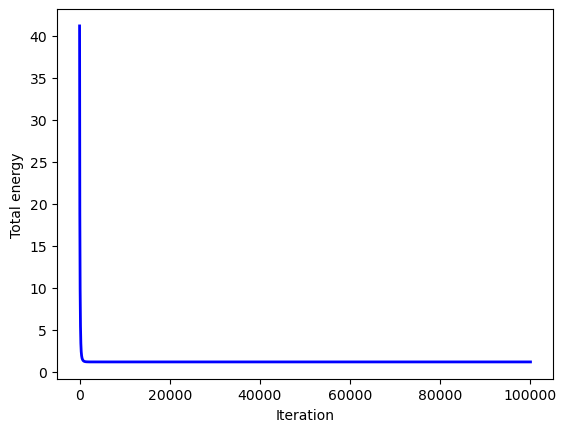

========First Structure========


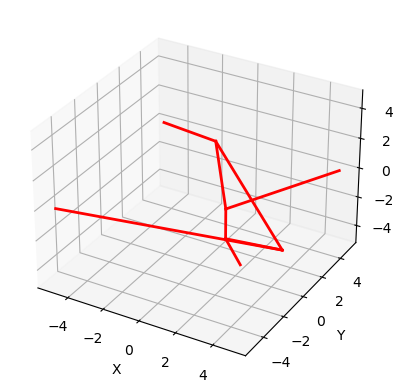

========Final Structure========


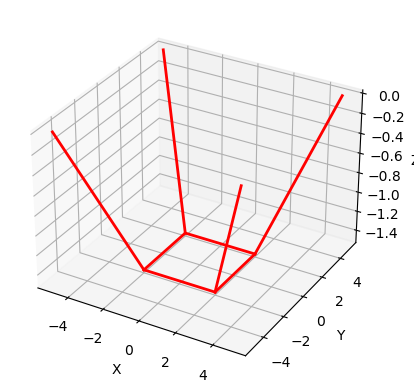

array([[ 5. ,  5. ,  0. ],
       [-5. ,  5. ,  0. ],
       [-5. , -5. ,  0. ],
       [ 5. , -5. ,  0. ],
       [ 2. ,  2. , -1.5],
       [-2. ,  2. , -1.5],
       [-2. , -2. , -1.5],
       [ 2. , -2. , -1.5]])

In [267]:
# which nodes are fixed
fixed_nodes = [0, 1 ,2 ,3]

# positions of the fixed nodes
p = np.array([[5.0, 5.0, 0.0], 
              [-5.0, 5.0, 0.0],
             [-5.0, -5.0, 0.0],
             [5.0, -5.0, 0.0]])

# masses: array of size (N,) representing masses loaded on the node 5 to 8 (mig)
masses = [0.0,0.0,0.0,0.0,1/6,1/6,1/6,1/6]

k = 3
l = 3

cables = [(1, 5, l, k), (2, 6, l, k), (3, 7, l, k), (4, 8, l, k),
        (5, 6, l, k), (6, 7, l, k), (7, 8, l, k), (5, 8, l, k)]
# Define the initial positions of the nodes. Nodes 1 to 4 are fixed as p
x0 = np.array([[5.0, 5.0, 0.0], 
              [-5.0, 5.0, 0.0],
              [-5.0, -5.0, 0.0],
              [5.0, -5.0, 0.0],
              [2.0, -1.0, 0.0],
              [2.0, -2.0, 5.0],
              [3.0, 3.0, -5.0],
              [2.0, -1.0, -2.0]])
gradient_descent_fixed_5(x0, cables, masses, p, fixed_nodes, 0.01, 100000)

### Problem 9

#### Defining the general form of the total energy function with bars, cables and external energy. 

In [268]:
def total_energy(X, rhoG, bars, cables, masses):
    
    """
    This function takes in the position of the nodes and information
    about the rhoG and cables and masses and calculates the total energy.
    
    X: array of which indicates the position of the nodes.
    rhoG: the multiplication of the rho which is the line density of the bar
        and by g which is the gravitational acceleration on the earth’s surface.
    bars: a list of tuples including i, j, l and c.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    """
    # Since the function takes in the flatted form of the positions of the nodes
    # we try to reshape X
    X = X.reshape(8,3)

    # Initializing the total energy to zero
    E = 0
    # Computing the energy of each bar
    for bar in bars:
        i, j, l, c = bar
        x_i = X[i-1]
        x_j = X[j-1]
        dist1 = np.linalg.norm(x_i - x_j)
        E += (c / (2 * l**2) * ((dist1 - l)**2)) + (rhoG * (x_i[2] + x_j[2]) * l / 2)
        
    # Computing the energy of each cable
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        dist2 = np.linalg.norm(x_i - x_j)
        if dist2 > l:
            E += k / (2 * l**2) * ((dist2 - l)**2)
            
    # Computing the external energy
    E += np.dot(masses, X[:,2])
    
    return E

#### Defining the Gradient descent method for the problem 9

In [274]:
def gradient_descent_fixed_9(X, rhoG, bars, cables, masses, p, fixed_nodes, learning_rate, num_iterations):
    
    """
    This function takes in the position of the nodes and information
    about the bars and cables and masses and a list indicating which 
    nodes are fixed and a learning rate and the iteration number to optimize 
    the cost function and return the new positions for the nodes and plots the structure
    with the initial positions and the final positions and also returns the energy value.
    X: array of which indicates the position of the nodes.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    p: an array indicating the positions of the fixed nodes.
    fixed_nodes: a list indicating which nodes are fixed.
    """

    E_history = np.zeros(num_iterations)
    X_history = np.zeros((num_iterations, X.shape[0], X.shape[1]))

    for i in range(num_iterations):
        E = total_energy(X, rhoG, bars, cables, masses)
        E_history[i] = E
        X_history[i] = X

        dX = np.zeros_like(X)
        for j in range(X.shape[0]):
            if j not in fixed_nodes:
                for k in range(3):
                    X_plus = np.copy(X)
                    X_minus = np.copy(X)
                    X_plus[j, k] += 1e-6
                    X_minus[j, k] -= 1e-6
                    dX[j, k] = (total_energy(X_plus, rhoG, bars, cables, masses) - total_energy(X_minus, rhoG, bars, cables, masses)) / (2 * 1e-6)
        X -= learning_rate * dX
        X[fixed_nodes] = p[fixed_nodes]
        
    print('This is the energy with the achieved final positions for the nodes', total_energy(X, rhoG, bars, cables, masses))
    plt.plot(E_history, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Total energy')
    plt.show()
    
    print('===========First Structure========')
    # Plot structure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for cable in cables:
        i, j, l, k = cable
        x_i = X_history[0][i-1]
        x_j = X_history[0][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'r-', linewidth=2)
    for bar in bars:
        i, j, l, c = bar
        x_i = X_history[0][i-1]
        x_j = X_history[0][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'b-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    print('===========Final Structure========')
    # Plot structure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for cable in cables:
        i, j, l, k = cable
        x_i = X_history[-1][i-1]
        x_j = X_history[-1][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'r-', linewidth=2)
    for bar in bars:
        i, j, l, c = bar
        x_i = X_history[-1][i-1]
        x_j = X_history[-1][j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'b-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
        
    return X

#### Test Case for problem 9

This is the energy with the achieved final positions for the nodes 0.009285891102004873


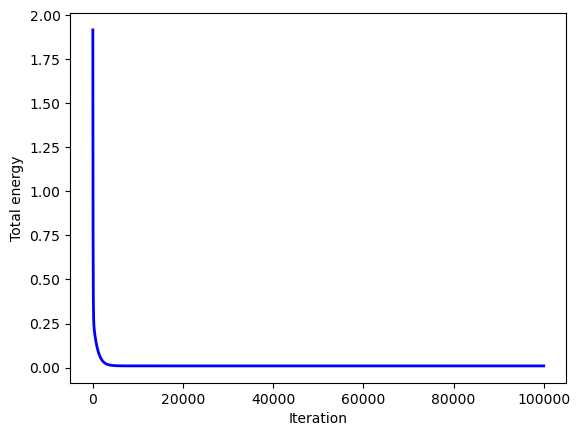

===========First Structure========


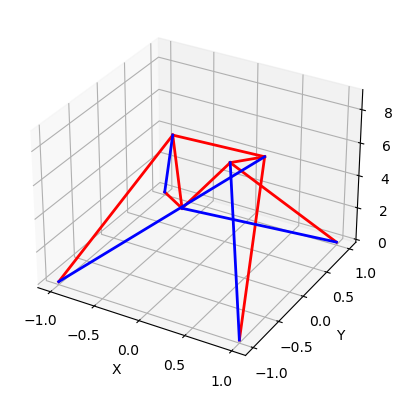

===========Final Structure========


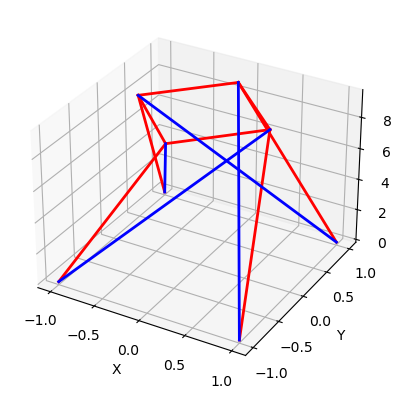

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [-6.95387506e-01,  2.22918093e-02,  9.54695809e+00],
       [ 2.72433735e-02, -6.74273340e-01,  9.54508572e+00],
       [ 7.25679419e-01,  4.64748324e-02,  9.53566956e+00],
       [ 3.06901982e-03,  7.43025965e-01,  9.53809747e+00]])

In [275]:
# defining constants
k = 0.1
c = 1
rhoG = 0.0
# which nodes are fixed
fixed_nodes = [0, 1 ,2 ,3]

# positions of the fixed nodes
p = np.array([[1.0, 1.0, 0.0], 
              [-1.0, 1.0, 0.0],
             [-1.0, -1.0, 0.0],
             [1.0, -1.0, 0.0]])

# bars: list of tuples (i, j, l, c) representing bars with indices i,j and thickness k
bars = [(1,5,10,c), (2,6,10,c), (3,7,10,c), (4,8,10,c)]


# masses: array of size (N,) representing masses loaded on the node 5 to 8 (mig)
masses = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


# cables: list of tuples (i, j, l, k) representing cables with indices i,j and resting length l
cables = [(1, 8, 8, k), (2, 5, 8, k), (3, 6, 8, k), (4, 7, 8, k),
        (5, 6, 1, k), (6, 7, 1, k), (7, 8, 1, k), (8, 5, 1, k)]
# Defining the initial positions of the nodes. Nodes 1 to 4 are fixed as p
x0 = np.array([[1.0, 1.0, 0.0], 
              [-1.0, 1.0, 0.0],
             [-1.0, -1.0, 0.0],
             [1.0, -1.0, 0.0],
              [-0.2, 0.0, 3],
              [0.0, -0.5, 9],
              [0.7, 0.0, 7.5],
              [0.0, 0.6, 4.5]])

gradient_descent_fixed_9(x0, rhoG, bars, cables, masses, p, fixed_nodes, 0.05, 100000)

### Problem 12

#### Defining the gradient function for the total energy of the structure

In [276]:
def gradient_total_energy(X, rhoG, bars, cables, masses):
    
    """
    This function takes in the position of the nodes and information
    about the rhoG and cables and masses and calculates the gradient.
    
    X: array which indicates the position of the nodes.
    rhoG: the multiplication of the rho which is the line density of the bar
        and by g which is the gravitational acceleration on the earth’s surface.
    bars: a list of tuples including i, j, l and c.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    """
    # Reshaping the X since it's flattened
    X = X.reshape(8, 3)
    n = len(X)
    G = np.zeros((n, 3))
    for bar in bars:
        i, j, l, c = bar
        x_i = X[i-1]
        x_j = X[j-1]
        dist = np.linalg.norm(x_i - x_j)
        if dist == 0:
            continue
        grad_dist = (x_i - x_j) / dist
        G[i-1] += c / l**2 * (dist - l) * grad_dist + rhoG * l / 2 * np.array([0, 0, 1])
        G[j-1] -= c / l**2 * (dist - l) * grad_dist + rhoG * l / 2 * np.array([0, 0, 1])
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        dist = np.linalg.norm(x_i - x_j)
        if dist == 0:
            continue
        grad_dist = (x_i - x_j) / dist
        if dist > l:
            G[i-1] += k / l**2 * (dist - l) * grad_dist
            G[j-1] -= k / l**2 * (dist - l) * grad_dist
    # Gradient of the external force contribution
    G[:, 2] += masses

    return G.flatten()

### Defining the total energy function including a penalty term for problem 12
###### The constraint of the problem 12 was that the structure should be above the ground. and this issue has been handled by two methods in which the BFGS method itself used two kinds of approach which will be noted forward.
###### 1.
###### Defining gradient descent function that can imply the constraint by receiving bounds

In [277]:
def gradient_descent_bounds(total_energy, gradient_total_energy, X0, rhoG, bars, cables, masses, bounds, alpha, max_iter, tol):
    """
    This function takes in the objective function which is the total
    energy and the gradient of that and the position of the nodes and information
    about the rhoG and cables and masses and bounds which adds the bound of 0 and + 
    for the z--coordinate of the nodes and a learning rate and a tolerance to perform
    the gradient descent algorithm and find the best positions for the nodes.
    
    X: array which indicates the position of the nodes.
    rhoG: the multiplication of the rho which is the line density of the bar
        and by g which is the gravitational acceleration on the earth’s surface.
    bars: a list of tuples including i, j, l and c.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    """
    X = np.array(X0)
    n_nodes = X.shape[0]

    for iteration in range(max_iter):
        # Compute gradient
        grad = gradient_total_energy(X, rhoG, bars, cables, masses).reshape(-1, 3)

        # Update positions with gradient and step size
        X_new = X - alpha * grad

        # Project the variables onto the feasible region (non-negative z-coordinates)
        for i in range(n_nodes):
            X_new[i, 2] = max(bounds[i * 3 + 2][0], X_new[i, 2])

        # Check convergence
        if np.linalg.norm(X_new - X) < tol:
            break

        X = X_new

    return X

In [278]:
def gradient_descent_bounds_12(total_energy, gradient_total_energy, X0, rhoG, bars, cables, masses, bounds, alpha, max_iter, tol):
    X = np.array(X0)
    print('This is the energy with the initial points', total_energy(X, rhoG, bars, cables, masses))
    n_nodes = X.shape[0]

    # Plot initial structure
    plot_structure(X, bars, cables, "Initial Structure")

    for iteration in range(max_iter):
        # Compute gradient
        grad = gradient_total_energy(X, rhoG, bars, cables, masses).reshape(-1, 3)

        # Update positions with gradient and step size
        X_new = X - alpha * grad

        # Project the variables onto the feasible region (non-negative z-coordinates)
        for i in range(n_nodes):
            X_new[i, 2] = max(bounds[i * 3 + 2][0], X_new[i, 2])

        # Check convergence
        if np.linalg.norm(X_new - X) < tol:
            break

        X = X_new
        
    print('This is the energy with the achieved final positions for the nodes', total_energy(X, rhoG, bars, cables, masses))

    # Plot final structure
    plot_structure(X, bars, cables, "Final Structure")

    return X

The result of this algorithm on problem 12 will be shown forward in the test case part for problem 12.

### Defining the BFGS method and the line search method for problem 12

In [279]:
def backtracking_line_search(X, p, grad, f, alpha, beta, c):
    
    """
    The backtracking line search aims to find
    a suitable step size alpha that satisfies 
    the Armijo condition, ensuring that the 
    total energy function is sufficiently 
    reduced at each step.
    it takes the position of the nodes, the search direction,
    the gradient in that position of the nodes along with 
    alpha and tuning parameters then it return the new alpha.
    It also applied the constraint and projects the new X on 
    the feasible set.
    """
    
    E_current = f(X)
    while True:
        X_new = X + alpha * p
        X_new = X_new.reshape(8,3)
        # Project onto the feasible region (non-negative z-coordinates)
        X_new[:, 2] = np.maximum(X_new[:, 2], 0)  
        X_new = X_new.flatten()
        E_new = f(X_new)
        if E_new <= E_current + c * alpha * np.dot(grad, p):
            return alpha
        alpha *= beta

This BFGS function handles the constraint by projecting the new position of the nodes onto the feasible region which the z--coordinates are non-negative.

In [288]:
def BFGS(X_init, f, df, bars, cables, max_iterations, tolerance):
    
    """
    This function takes in the initial positions for the nodes and the total energy
    function and the derivative of that which is the gradient function along with the
    informations for the bars, cables and returns the new positions of the nodes.
    it uses the Backtracking line search and it handles the constraint by
    projecting the new X onto the feasible set.
    """
    X = X_init.copy()
    print('This is the energy with the initial points', f(X))

    n = len(X)
    # Initialize Hessian approximation as the identity matrix
    H = np.eye(n)  
    
    for iteration in range(max_iterations):
        grad = df(X)
        if np.linalg.norm(grad) < tolerance:
            break
        
        # defining the Search direction
        p = -np.dot(H, grad)  
        
        # using Backtracking line search to find the step size alpha
        alpha = backtracking_line_search(X, p, grad, f, alpha=1, beta=0.5, c=1e-4)
       
        X_new = X + alpha * p
        X_new = X_new.reshape(8,3)
        
        # Projecting onto the feasible region (non-negative z-coordinates)
        X_new[:, 2] = np.maximum(X_new[:, 2], 0) 
        X_new = X_new.flatten()
        
        grad_new = df(X_new)
        
        s = X_new - X
        y = grad_new - grad
        
        # Updating Hessian approximation using BFGS update formula
        sy = np.dot(y, s)
        if sy > 1e-8:  # Skips the update if the dot product is close to zero
            rho = 1 / sy
            H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)
        
        X = X_new
        grad = grad_new
    print('This is the energy with the achieved final positions for the nodes', f(X))   
    plot_structure(X, bars, cables, "Final Structure")
    return np.array([X]).reshape(8,3)

###### 2.B 
###### Adding a penalty term to the total energy function and gradient of that and also to the line search method for BFGS.

In [289]:
def total_energy_with_penalty(X, rhoG, bars, cables, masses, penalty_factor):
    
    """
    This function takes in the position of the nodes and information
    about the rhoG and cables and masses and an integer number as
    a penalty factor and calculates the total energy.
    
    X: array which indicates the position of the nodes.
    rhoG: the multiplication of the rho which is the line density of the bar
        and by g which is the gravitational acceleration on the earth’s surface.
    bars: a list of tuples including i, j, l and c.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    penalty factor: an integer number to be multipled and increase the energy.
    """
    # Since the function takes in the flatted form of the positions of the nodes
    # we try to reshape the X
    X = X.reshape(8, 3)
    
    # Initializing the total energy to zero
    E = 0
    # Computing energy of each bar
    for bar in bars:
        i, j, l, c = bar
        x_i = X[i-1]
        x_j = X[j-1]
        dist1 = np.linalg.norm(x_i - x_j)
        E += (c / (2 * l**2) * ((dist1 - l)**2)) + (rhoG * (x_i[2] + x_j[2]) * l / 2)
        
    # Computing energy of each cable
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        dist2 = np.linalg.norm(x_i - x_j)
        if dist2 > l:
            E += k / (2 * l**2) * ((dist2 - l)**2)
    E += np.dot(masses, X[:, 2])  # External force contribution
    
    # Adding penalty term for the constraint 
    penalty = penalty_factor * np.sum(np.maximum(0, -X[:, 2])**2)
    E += penalty

    return E

In [290]:
def gradient_total_energy_with_penalty(X, rhoG, bars, cables, masses, penalty_factor):
    
    """
    This function takes in the position of the nodes and information
    about the rhoG and cables and masses and calculates the gradient.
    
    X: array which indicates the position of the nodes.
    rhoG: the multiplication of the rho which is the line density of the bar
        and by g which is the gravitational acceleration on the earth’s surface.
    bars: a list of tuples including i, j, l and c.
    cables: a list of tuples including i, j, l and k.
    masses: a list indicating the multiplication of Mi and g for some nodes.
    penalty factor: an integer number to be multipled and increase the gradient in terms of violation.
    """
    X = X.reshape(8, 3)
    n = len(X)
    G = np.zeros((n, 3))
    for bar in bars:
        i, j, l, c = bar
        x_i = X[i-1]
        x_j = X[j-1]
        dist = np.linalg.norm(x_i - x_j)
        if dist == 0:
            continue
        grad_dist = (x_i - x_j) / dist
        G[i-1] += c / l**2 * (dist - l) * grad_dist + rhoG * l / 2 * np.array([0, 0, 1])
        G[j-1] -= c / l**2 * (dist - l) * grad_dist + rhoG * l / 2 * np.array([0, 0, 1])
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        dist = np.linalg.norm(x_i - x_j)
        if dist == 0:
            continue
        grad_dist = (x_i - x_j) / dist
        if dist > l:
            G[i-1] += k / l**2 * (dist - l) * grad_dist
            G[j-1] -= k / l**2 * (dist - l) * grad_dist
    # Gradient of the external force contribution
    G[:, 2] += masses  

    # Adding the gradient of the penalty term for the constraint 
    penalty_grad = -2 * penalty_factor * np.maximum(0, -X[:, 2])
    G[:, 2] += penalty_grad

    return G.flatten()

#### Defining the line search method for problem 12 to be used by BFGS method

In [291]:
def backtracking_line_search_with_penalty(X, p, grad, f, penalty_factor, alpha, beta, c):
    
    """
    The backtracking line search aims to find
    a suitable step size alpha that satisfies 
    the Armijo condition, ensuring that the 
    total energy function is sufficiently 
    reduced at each step.
    it takes the position of the nodes, the search direction,
    the gradient in that position of the nodes, a penalty term
    along with alpha and tuning parameters then it return the new alpha.
    """
    E_current = f(X, penalty_factor)
    while True:
        X_new = X + alpha * p
        E_new = f(X_new, penalty_factor)
        if E_new <= E_current + c * alpha * np.dot(grad, p):
            return alpha
        alpha *= beta

In [292]:
def adaptive_BFGS(X_init, f, df, bars, cables, max_iter, max_penalty_iter, init_penalty_factor, penalty_factor_mult):
    
    """
    This function takes in the initial positions for the nodes and the total energy
    function and the derivative of that which is the gradient function along with the
    informations for the bars, cables and returns the new positions of the nodes.
    it uses the Backtracking line search and it handles the constraint by
    adding penalty term and also it increases iteratively the penalty term so when the
    constraint satisfies it stops increasing the penalty term and returns the new X positions.
    """
    X = X_init.copy()
    print('This is the energy with the initial points', f(X, init_penalty_factor))

    penalty_factor = init_penalty_factor

    for penalty_iter in range(max_penalty_iter):
        X_prev = X.copy()
        H_inv = np.eye(len(X))

        for iter in range(max_iter):
            g = df(X, penalty_factor)
            p = -H_inv @ g
            alpha = backtracking_line_search_with_penalty(X , p, g, f, penalty_factor, alpha=1, beta=0.5, c=1e-4)
            s = alpha * p
            X += s

            if np.linalg.norm(s) < 1e-6:
                break

            g_new = df(X, penalty_factor)
            y = g_new - g
            rho = 1 / np.dot(y, s)
            H_inv = (np.eye(len(X)) - rho * np.outer(s, y)) @ H_inv @ (np.eye(len(X)) - rho * np.outer(y, s)) + rho * np.outer(s, s)
            g = g_new
            
        X = X.reshape(8,3)
        if np.all(X[:, 2] >= 0):
            break
        X = X.flatten()

        penalty_factor *= penalty_factor_mult
    
    print('This is the energy with the achieved final positions for the nodes', f(X,penalty_factor))   
    plot_structure(X, bars, cables, "Final Structure")
    return np.array([X]).reshape(8,3)

#### Defining a function to plot the structure in 3D

In [293]:
def plot_structure(X, bars, cables, title):
    X = X.reshape(8,3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for cable in cables:
        i, j, l, k = cable
        x_i = X[i-1]
        x_j = X[j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'r-', linewidth=2)
    for bar in bars:
        i, j, l, c = bar
        x_i = X[i-1]
        x_j = X[j-1]
        ax.plot([x_i[0], x_j[0]], [x_i[1], x_j[1]], [x_i[2], x_j[2]], 'b-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

#### Test case for problem 12

============================PROBLEEM 12 WITH GRADIENT DESCENT METHOD===========================
This is the energy with the initial points 20.32396196237491


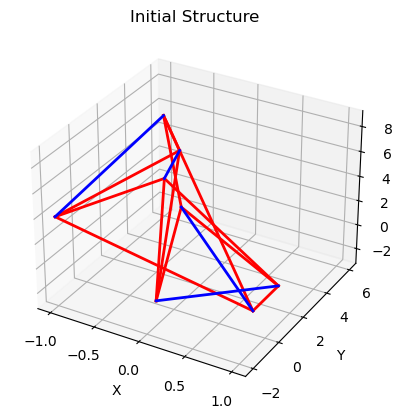

This is the energy with the achieved final positions for the nodes 5.881015777126132


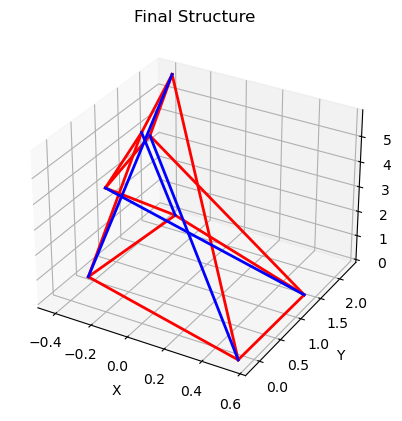

[[ 0.55610801  1.41789133  0.        ]
 [-0.36576841  2.25862823  0.        ]
 [-0.42846488  0.48937851  0.        ]
 [ 0.54992622 -0.14732123  0.        ]
 [-0.31913241  0.50159563  3.82289233]
 [-0.22676528  0.94872777  5.54307391]
 [-0.36367753  2.20104434  5.92262664]
 [-0.30222573  1.43005542  4.6154137 ]]
================================PROBLEEM 12 WITH BFGS METHOD===============================
This is the energy with the initial points 20.32396196237491
This is the energy with the achieved final positions for the nodes 5.621342316394504


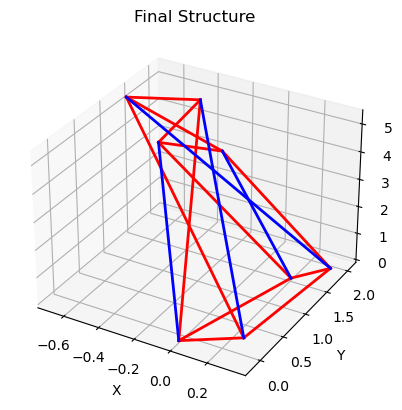

[[ 2.57927895e-01  2.31161394e-01  0.00000000e+00]
 [ 3.01996520e-03 -1.49807618e-01  0.00000000e+00]
 [ 2.02674944e-01  1.50619854e+00  0.00000000e+00]
 [ 3.30976248e-01  1.90163376e+00  0.00000000e+00]
 [-4.60957611e-01  2.04619216e+00  4.63858097e+00]
 [-4.31677469e-01  1.04918052e+00  4.48948602e+00]
 [-1.24727908e-01  1.23997954e+00  4.44588435e+00]
 [-6.77236064e-01  1.27546169e+00  5.38734346e+00]]
================================PROBLEEM 12 WITH BFGS METHOD using penalty===============================
This is the energy with the initial points 65.32396196237491
This is the energy with the achieved final positions for the nodes 0.01552236308500735


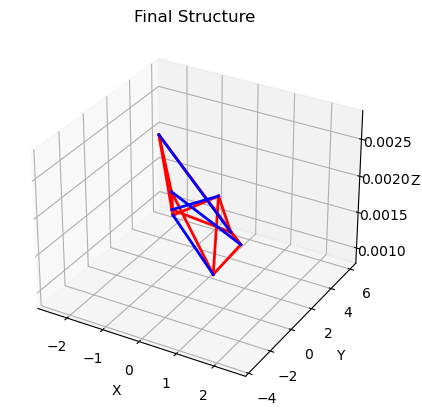

[[ 2.45813061e+00 -3.57514546e+00  2.35763955e-03]
 [ 1.63472038e+00 -3.13433800e+00  1.78625094e-03]
 [ 1.80816766e+00 -3.29556348e+00  2.83923107e-03]
 [ 2.05691959e+00 -3.05697108e+00  2.38704464e-03]
 [-2.00787406e+00  5.12021053e+00  1.30042293e-03]
 [-2.21653489e+00  5.92898343e+00  8.25983057e-04]
 [-2.16618582e+00  5.65195217e+00  9.51274618e-04]
 [-2.46734346e+00  5.46087189e+00  2.00420481e-03]]


In [294]:
k = 0.1
c = 1
rhoG = 0.02

# masses a list indicating the multiplication of the mi and g for the nodes
masses = [1/6,1/6,1/6,1/6,1/6,1/6,1/6,1/6]

# bars: list of tuples (i, j, l, c) representing bars with indices i,j and thickness k
bars = [(1, 5, 10, c), (2, 6, 10, c), (3, 7, 10, c), (4, 8, 10, c)]

# cables: list of tuples (i, j, l, k) representing cables with indices i,j and resting length l
cables = [(1, 8, 8, k), (1, 2, 1, k), (1, 4, 1, k), (2, 3, 1, k), (2, 5, 8, k), (3, 4, 1, k), 
          (3, 6, 8, k), (4, 7, 8, k), (5, 6, 1, k), (6, 7, 1, k), (7, 8, 1, k), (5, 8, 1, k)]

# number of the nodes in the structure
n_nodes = 8

#Defining constraint of the z--coordinates
bounds = [(None, None), (None, None), (0, None)] * n_nodes

# initial positions of the nodes
x0 = np.array([[1.0, 1.0, 0.0], 
              [-1.0, 6.0, 0.0],
             [-1.0, -2.0, 4.0],
             [1.0, -1.0, 0.0],
              [-0.2, 0.0, -3.0],
              [0.0, 0.5, 9],
              [-0.7, 4.0, 7.5],
              [0.0, 0.6, 4.5]])

# accessing total energy function with function f for BFGS method
def f(X):
    return total_energy(X, rhoG, bars, cables, masses)
# accessing gradient of the total energy with function df for BFGS method
def df(X):
    return gradient_total_energy(X, rhoG, bars, cables, masses)

# accessing the total energy function which includes the penalty factor for the adabtive_BFGS method
def fP(X, penalty_factor):
    return total_energy_with_penalty(X, rhoG, bars, cables, masses,  penalty_factor)
# accessing the gradient of the total energy function which includes the penalty factor for the adabtive_BFGS method
def dfP(X, penalty_factor):
    return gradient_total_energy_with_penalty(X, rhoG, bars, cables, masses, penalty_factor)


# testing and comparing the different methods on problem 12
print('============================PROBLEEM 12 WITH GRADIENT DESCENT METHOD===========================')
print(gradient_descent_bounds_12(total_energy, gradient_total_energy, x0, rhoG, bars, cables, masses, bounds, alpha=0.01, max_iter=1000, tol=1e-6))

print('================================PROBLEEM 12 WITH BFGS METHOD===============================')
print(BFGS(x0.flatten(), f, df, bars, cables, max_iterations=100, tolerance=1e-6))

print('================================PROBLEEM 12 WITH BFGS METHOD using penalty===============================')
print(adaptive_BFGS(x0.flatten(), fP, dfP, bars, cables, max_iter=200, max_penalty_iter=10, init_penalty_factor=5, penalty_factor_mult=5))
